In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv("kiwilytics_orders.csv")
df.head()

,order_id,customer_name,product,quantity,unit_price,order_date
0,1,Maria,Kiwi Chips,2,3.0,2024-01-29
1,2,Richard,Kiwi Chips,1,3.0,2024-01-08
2,3,Nicholas,Kiwi Candy,1,2.5,2024-01-25
3,4,Raymond,Kiwi Candy,4,NaN,2024-01-04
4,5,David,Kiwi Juice,1,4.5,2024-02-25


In [3]:
df.shape

(100, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       100 non-null    int64  
 1   customer_name  100 non-null    object 
 2   product        100 non-null    object 
 3   quantity       100 non-null    int64  
 4   unit_price     92 non-null     float64
 5   order_date     100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [5]:
df.describe()

,order_id,quantity,unit_price
count,100.000000,100.000000,92.000000
mean,50.500000,2.910000,3.961957
std,29.011492,1.371389,1.326471
min,1.000000,1.000000,2.500000
25%,25.750000,2.000000,2.500000
50%,50.500000,3.000000,3.750000
75%,75.250000,4.000000,5.500000
max,100.000000,5.000000,6.000000


In [19]:
# Data validation checks
print('Invalid quantities:', (df['quantity'] <= 0).sum())
print('Invalid prices:', (df['unit_price'] <= 0).sum())

Invalid quantities: 0
Invalid prices: 0


In [6]:
df.isna().sum()

,0
order_id,0
customer_name,0
product,0
quantity,0
unit_price,8
order_date,0


In [20]:
# Fill missing unit prices with the average price for that product
avg_prices = df.groupby('product')['unit_price'].mean()
df['unit_price'] = df['unit_price'].fillna(df['product'].map(avg_prices))

In [21]:
df.isna().sum()

,0
order_id,0
customer_name,0
product,0
quantity,0
unit_price,0
order_date,0


In [23]:
df['total_price'] = df['quantity'] * df['unit_price']
df.head()

,order_id,customer_name,product,quantity,unit_price,order_date,total_price
0,1,Maria,Kiwi Chips,2,3.0,2024-01-29,6.0
1,2,Richard,Kiwi Chips,1,3.0,2024-01-08,3.0
2,3,Nicholas,Kiwi Candy,1,2.5,2024-01-25,2.5
3,4,Raymond,Kiwi Candy,4,2.5,2024-01-04,10.0
4,5,David,Kiwi Juice,1,4.5,2024-02-25,4.5


In [26]:
# Calculate total revenue

total_revenue = df['total_price'].sum()
print('Total Revenue:', total_revenue)

Total Revenue: 1167.5


In [27]:
# Which product has the highest total quantity sold?
product_sales = df.groupby('product')['quantity'].sum()
product_sales

,quantity
product,
Kiwi Candy,70
Kiwi Chips,73
Kiwi Jam,41
Kiwi Juice,61
Kiwi Smoothie,46


In [28]:
top_product = product_sales.idxmax()
print('Top Product:', top_product)


Top Product: Kiwi Chips


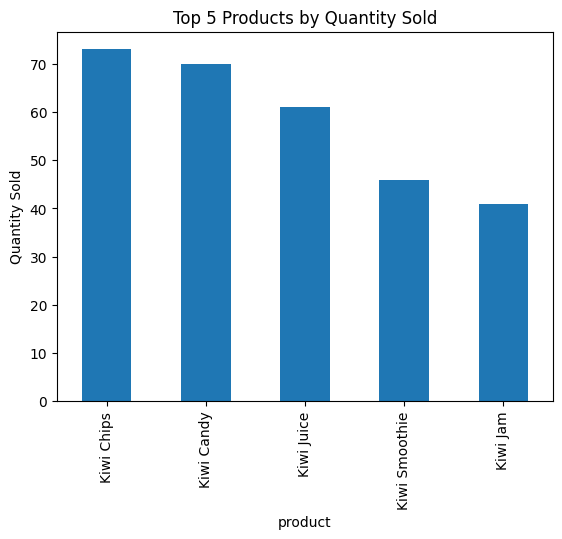

In [29]:
# Visualization
product_sales.sort_values(ascending=False).head(5).plot(kind='bar', title='Top 5 Products by Quantity Sold')
plt.ylabel('Quantity Sold')
plt.show()

In [30]:
# Which customer has the highest total spending?
customer_spending = df.groupby('customer_name')['total_price'].sum()
customer_spending

,total_price
customer_name,
Alex,2.5
Alyssa,6.0
Amanda,4.5
Andrew,15.0
Anthony,7.0
...,...
Thomas,17.0
Tiffany,9.0
Todd,24.0


In [31]:
top_customer = customer_spending.idxmax()
print('Top Customer:', top_customer)


Top Customer: Eric


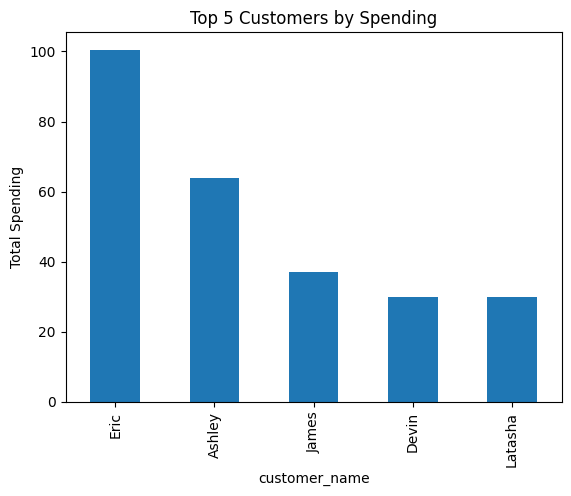

In [32]:
customer_spending.sort_values(ascending=False).head(5).plot(kind='bar', title='Top 5 Customers by Spending')
plt.ylabel('Total Spending')
plt.show()